# Day 18 :)

In [1]:
import numpy as np
import pathlib
from PIL import Image

In [2]:
def read_dig_plan(path):
    plan = []
    for line in pathlib.Path(path).read_text().splitlines():
        d, s, c = line.split()
        s = int(s)
        plan.append((d, s, c))
    return plan


def get_edge_points(plan, start=(300, 400)):
    position = start
    edges = []
    for direction, step, _ in plan:
        for _ in range(step):
            match direction:
                case "L":
                    position = (position[0], position[1] - 1)
                case "R":
                    position = (position[0], position[1] + 1)
                case "U":
                    position = (position[0] + 1, position[1])
                case "D":
                    position = (position[0] - 1, position[1])
            edges.append(position)
    return edges

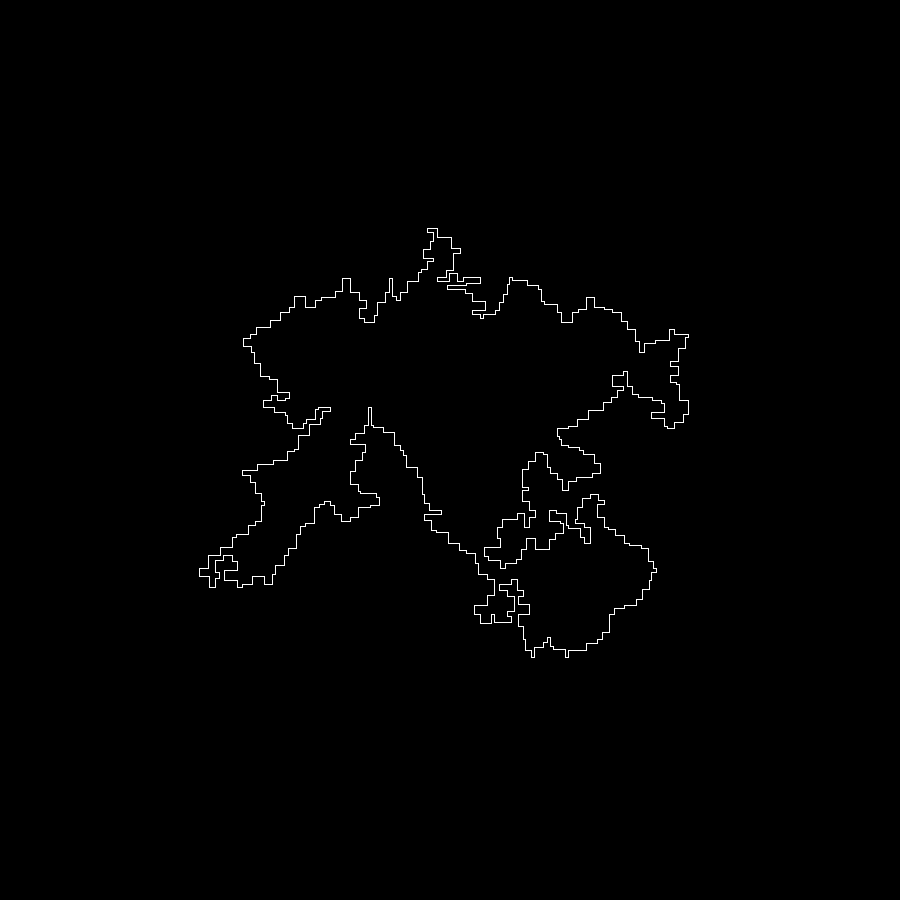

In [3]:
plan = read_dig_plan("input.txt")

image_data = np.zeros((900, 900, 3), dtype=np.uint8)

edge_points = get_edge_points(plan)

num_rows, num_cols, _ = image_data.shape
for i in range(num_rows):
    for j in range(num_cols):
        if (i, j) in edge_points:
            image_data[i, j] = [255, 255, 255]

img = Image.fromarray(image_data)
img.show()

In [4]:
img.save("trench.bmp")

Now open `trench.bmp` in Microsoft Paint and use the fill tool to fill the trench with red because it is full of Lava. Save the file and continue below.

In [5]:
rgb_img = Image.open("trench.bmp").convert("RGB")

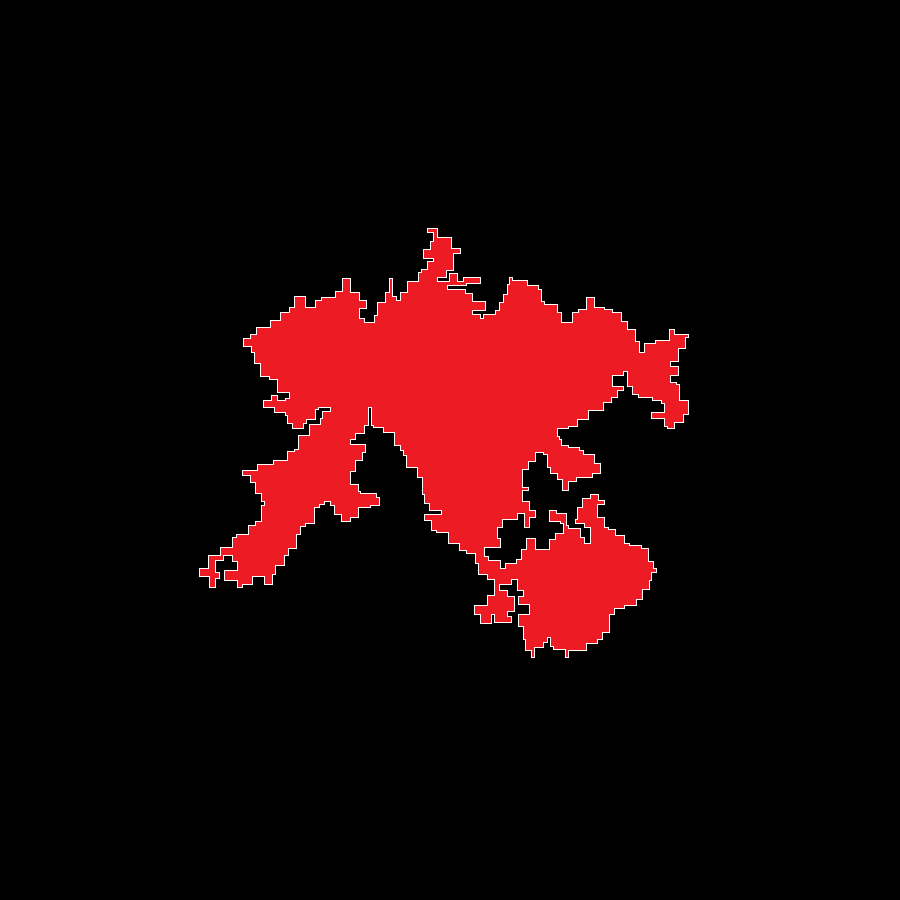

In [6]:
rgb_img.show()

In [7]:
lava = 0
num_rows, num_cols = rgb_img.size
for i in range(num_rows):
    for j in range(num_cols):
        if rgb_img.getpixel((i, j)) != (0, 0, 0):
            lava += 1

In [8]:
assert lava == 92758